<h4>Data-Driven Insights for Ken Jee's YouTube Channel</h4>
<br/>
This dataset consists the data from Nov 2017 - Jan 2022. Ken Jee has gathered some of this data via the YouTube API and the rest from his specific analytics.

1) Aggregated Metrics By Video - This has all the topline metrics from my channel from its start (around 2015 to Jan 22 2022). I didn't post my first video until around
2) Aggregated Metrics By Video with Country and Subscriber Status - This has the same data as aggregated metrics by video, but it includes dimensions for which country people are viewing from and if the viewers are subscribed to the channel or not.
3) Video Performance Over Time - This has the daily data from each of my videos.
4) All Comments - This is all of my comment data gathered from the YouTube API. I have anonymized the users so don't worry about your name showing up!
<br /><br />
The profitability of Ken Jee's YouTube channel serves as a key metric, reflecting the effectiveness of strategies aimed at maximizing revenue generation through factors like viewership, engagement, and subscriber growth.<br /><br />
Analysis <br />
1. Videos generated the highest revenue in terms of RPM (Revenue per thousand impressions) and CPM (Cost per thousand impressions)<br />
2. Top 5 countries by video likes added and average view percentage<br />
3. K-means clustering to analyze the factors affecting Ken Jee's YouTube channel<br />
4. Top positive/negative words/sentences in comments<br />
5. Factors contributing to fluctuations in the profitability of Ken Jee's YouTube channel over time

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt

<h5 >Load The Data</h5>

In [2]:
df_agg_video = pd.read_csv(r'C:\Users\Anupama S\Desktop\portfolio\data\Aggregated_Metrics_By_Video.csv').iloc[1:,:]
df_agg_subscription = pd.read_csv(r'C:\Users\Anupama S\Desktop\portfolio\data\Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
df_comments = pd.read_csv(r'C:\Users\Anupama S\Desktop\portfolio\data\All_Comments_Final.csv')
df_video_over_time = pd.read_csv(r'C:\Users\Anupama S\Desktop\portfolio\data\Video_Performance_Over_Time.csv')

<h5>Exploratory Data Analysis</h5>

In [3]:
df_agg_video.head(3)

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72
3,hO_YKK_0Qck,Uber Driver to Machine Learning Engineer in 9 ...,"Jul 16, 2020",402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,189,202.963,442334,2.53


In [4]:
df_agg_video.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,221.000000,223.000000,2.230000e+02,223.000000,223.000000,223.000000,2.230000e+02,223.000000
mean,63.654709,177.753363,17.497758,1008.865471,13.260090,587.309417,4.438300,11.440303,34.120807,2.496860e+04,1424.201917,574.049327,130.348578,4.526904e+05,3.083812
std,91.559620,733.331174,69.578517,3577.895609,33.242009,3302.316610,1.792295,3.342147,15.144409,8.960956e+04,4804.353468,3270.679889,554.503516,1.864351e+06,1.674199
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,163.000000,2.000000,27.000000,3.219500,9.377000,23.515000,3.933000e+03,176.995550,19.500000,12.145500,9.894000e+04,1.920000
50%,37.000000,46.000000,4.000000,342.000000,7.000000,68.000000,4.334000,11.160000,35.260000,8.275000e+03,393.397300,62.000000,32.538000,1.541870e+05,2.890000
75%,66.000000,112.500000,11.000000,713.000000,14.000000,234.500000,5.382500,12.904000,43.485000,1.831800e+04,1128.712150,227.000000,93.901500,2.799850e+05,3.980000
max,907.000000,9583.000000,942.000000,46903.000000,451.000000,46904.000000,10.387000,37.786000,76.600000,1.253559e+06,65850.704200,46453.000000,7959.533000,2.649880e+07,11.510000


In [5]:
df_agg_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 1 to 223
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Video                                 223 non-null    object 
 1   Video title                           223 non-null    object 
 2   Video pub­lish time                   223 non-null    object 
 3   Com­ments ad­ded                      223 non-null    int64  
 4   Shares                                223 non-null    int64  
 5   Dis­likes                             223 non-null    int64  
 6   Likes                                 223 non-null    int64  
 7   Sub­scribers lost                     223 non-null    int64  
 8   Sub­scribers gained                   223 non-null    int64  
 9   RPM (USD)                             223 non-null    float64
 10  CPM (USD)                             221 non-null    float64
 11  Av­er­age per­cent­

In [6]:
df_agg_subscription.head(2)

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.67187,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.49887,29.433333,0


In [7]:
df_agg_subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55292 entries, 0 to 55291
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Video Title                 55292 non-null  object 
 1   External Video ID           55292 non-null  object 
 2   Video Length                55292 non-null  int64  
 3   Thumbnail link              55292 non-null  object 
 4   Country Code                54906 non-null  object 
 5   Is Subscribed               55292 non-null  bool   
 6   Views                       55292 non-null  int64  
 7   Video Likes Added           55292 non-null  int64  
 8   Video Dislikes Added        55292 non-null  int64  
 9   Video Likes Removed         55292 non-null  int64  
 10  User Subscriptions Added    55292 non-null  int64  
 11  User Subscriptions Removed  55292 non-null  int64  
 12  Average View Percentage     53854 non-null  float64
 13  Average Watch Time          538

In [8]:
df_comments.head(2)

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213


In [9]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Comments     10239 non-null  object
 1   Comment_ID   10240 non-null  object
 2   Reply_Count  10240 non-null  int64 
 3   Like_Count   10240 non-null  int64 
 4   Date         10240 non-null  object
 5   VidId        10240 non-null  object
 6   user_ID      10240 non-null  object
dtypes: int64(2), object(5)
memory usage: 560.1+ KB


In [10]:
df_video_over_time.head(2)

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0


In [11]:
df_video_over_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111857 entries, 0 to 111856
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        111857 non-null  object 
 1   Video Title                 111857 non-null  object 
 2   External Video ID           111857 non-null  object 
 3   Video Length                111857 non-null  int64  
 4   Thumbnail link              111857 non-null  object 
 5   Views                       111857 non-null  int64  
 6   Video Likes Added           111857 non-null  int64  
 7   Video Dislikes Added        111857 non-null  int64  
 8   Video Likes Removed         111857 non-null  int64  
 9   User Subscriptions Added    111857 non-null  int64  
 10  User Subscriptions Removed  111857 non-null  int64  
 11  Average View Percentage     110510 non-null  float64
 12  Average Watch Time          110510 non-null  float64
 13  User Comments 

In [12]:
    # Convert 'Video publish time' to datetime
df_agg_video['Video publish time'] = pd.to_datetime(df_agg_video['Video pub­lish time'],format='mixed')

    # Convert 'Average view duration' to timedelta
df_agg_video['Average view duration'] = pd.to_timedelta(df_agg_video['Av­er­age view dur­a­tion'])

    # Calculate duration in seconds
df_agg_video['Avg_duration_sec'] = df_agg_video['Average view duration'].dt.total_seconds()

    # Calculate 'Engagement ratio'
df_agg_video['Engagement_ratio'] = (df_agg_video['Com­ments ad­ded'] + df_agg_video['Shares'] +
                                        df_agg_video['Dis­likes'] + df_agg_video['Likes']) / df_agg_video['Views']

    # Calculate 'Views / sub gained'
df_agg_video['Views / sub gained'] = df_agg_video['Views'] / df_agg_video['Sub­scribers gained']

    # Sort by 'Video publish time'
df_agg_video.sort_values('Video publish time', ascending=False, inplace=True)

df_video_over_time['Date'] = pd.to_datetime(df_video_over_time['Date'],format='mixed')

<h5>Analysis</h5>

<h5>Overall revenue earned</h5>

In [41]:
total_revenue = df_agg_video['Your es­tim­ated rev­en­ue (USD)'].sum()

print("Overall revenue earned: ${:.2f}".format(total_revenue))

Overall revenue earned: $29067.73


<h5>Videos generated the highest revenue in terms of RPM (Revenue per thousand impressions) and CPM (Cost per thousand impressions)</h5><br />
RPM represents the revenue earned by a content creator for every thousand impressions (views) of ads on their content.<br />
CPM represents the cost paid by advertisers for every thousand impressions (views) of their ads on the content creator's platform.<br />
<strong>Impact on Profits:</strong><br />
Higher RPM: When a content creator has a higher RPM, they earn more revenue for each ad impression, leading to increased profits. Content creators can optimize their content and ad placement to increase RPM and maximize their earnings.<br />
Higher CPM: A higher CPM means that advertisers are willing to pay more to reach the content creator's audience. This can result in increased ad revenue for the content creator and higher profits, especially if they have a large and engaged audience.

In [34]:
highest_rpm = df_agg_video['RPM (USD)'].max()
rpm_video_title = df_agg_video[df_agg_video['RPM (USD)'] == highest_rpm]['Video title'].iloc[0]
highest_cpm = df_agg_video['CPM (USD)'].max()
cpm_video_title = df_agg_video[df_agg_video['CPM (USD)'] == highest_cpm]['Video title'].iloc[0]
print("Highest RPM:" ,highest_rpm)
print("Title:", rpm_video_title)
print("\n")
print("Highest CPM:", highest_cpm)
print("Title:", cpm_video_title)

Highest RPM: 10.387
Title: His Startup Will Land You a Data Science Job (Jeremie Harris) - KNN EP. 15


Highest CPM: 37.786
Title: Welcome To My Channel | Ken Jee | Data Science


In [14]:
fig = px.line(df_agg_video, x='Video publish time', y=['RPM (USD)', 'CPM (USD)'], 
              labels={'value': 'USD', 'variable': 'Metric'},
              title='Growth of RPM and CPM Over Time')
fig.update_xaxes(title_text='Video Publish Time')
fig.update_yaxes(title_text='USD')
# Show the plot
fig.show()

c:\Users\Anupama S\Desktop\portfolio\venv\Lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [15]:
from tabulate import tabulate

# Optimal Posting time
df_agg_video['Hour'] = df_agg_video['Video publish time'].dt.hour
df_agg_video['Weekday'] = df_agg_video['Video publish time'].dt.weekday

views_by_time_weekday = df_agg_video.groupby(['Hour', 'Weekday'])['Views'].max().reset_index()
min_views_by_time_weekday = df_agg_video.groupby(['Hour', 'Weekday'])['Views'].min().reset_index()

# Find the most active hour and weekday
most_active_hour = views_by_time_weekday.loc[views_by_time_weekday['Views'].idxmax()]
least_active_hour = views_by_time_weekday.loc[min_views_by_time_weekday['Views'].idxmin()]

most_active_hour_value = most_active_hour['Hour']
most_active_weekday = most_active_hour['Weekday']
most_active_views = most_active_hour['Views']

least_active_hour_value = least_active_hour['Hour']
least_active_weekday = least_active_hour['Weekday']
least_active_views = least_active_hour['Views']

# Convert weekday number to name
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
most_active_weekday_name = weekday_names[int(most_active_weekday)]
least_active_weekday_name = weekday_names[int(least_active_weekday)]

most_active_day_views = df_agg_video[(df_agg_video['Weekday'] == most_active_weekday) & (df_agg_video['Hour'] == most_active_hour_value)]
most_active_day_top_content = most_active_day_views.loc[most_active_day_views['Views'].idxmax()]['Video title']
most_active_day_views_count = most_active_day_views['Views'].sum()

least_active_day_views = df_agg_video[(df_agg_video['Weekday'] == least_active_weekday) & (df_agg_video['Hour'] == least_active_hour_value)]
least_active_day_top_content = least_active_day_views.loc[least_active_day_views['Views'].idxmax()]['Video title']
least_active_day_views_count = least_active_day_views['Views'].sum()

# Format the output as a table
table_data = [
    ["Most Active Hour", most_active_hour_value, most_active_views],
    ["Least Active Hour", least_active_hour_value, least_active_views],
    ["Most Active Weekday", most_active_weekday_name, ""],
    ["Least Active Weekday", least_active_weekday_name, ""],
    ["Type of Content with Highest Views on Most Active Day", most_active_day_top_content, most_active_day_views_count],
    ["Type of Content with Highest Views on Least Active Day", least_active_day_top_content, least_active_day_views_count]
]

print(tabulate(table_data, headers=["Category", "Hour", "Views"], tablefmt="grid"))


+--------------------------------------------------------+---------------------------------------------------------+---------+
| Category                                               | Hour                                                    | Views   |
+========================================================+=========================================================+=========+
| Most Active Hour                                       | 0                                                       | 1253559 |
+--------------------------------------------------------+---------------------------------------------------------+---------+
| Least Active Hour                                      | 0                                                       | 131630  |
+--------------------------------------------------------+---------------------------------------------------------+---------+
| Most Active Weekday                                    | Friday                                              

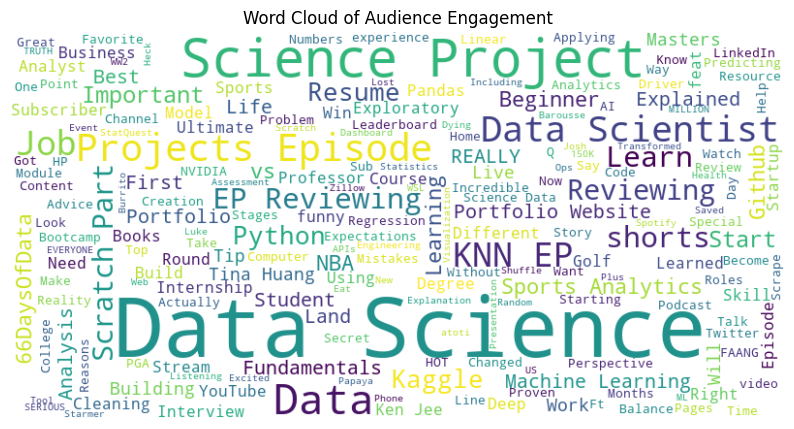

In [16]:
#Generate word cloud to identify the contents audiences are intrested
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_agg_video['Video title']))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Audience Engagement')
plt.show()

Based on the analysis on the growth of RPM and CPM,it shows the growth of RPM (Revenue per thousand impressions) and CPM (Cost per thousand impressions) over time from July 2017 to January 2022. The RPM line (in red) has several peaks, with the most significant peak occurring around early 2018. The CPM line (in blue) also shows variability but remains below the RPM for most of the timeline.
To identify which videos generated the highest revenue,<br  />
1.The data suggests that the most active hour for viewers is around midnight (0 hours), and the most active day is Friday. Posting new videos during these times could potentially lead to higher initial views and engagement.<br />
2.Based on the word cloud, it appears that your audience is highly interested in topics related to Data Science, Machine Learning, Python, and Projects. You can consider creating more content around these topics. This could include tutorials, case studies, or discussions about recent advancements in these fields.<br />
By regularly reviewing your performance metrics and feedback, you'll get to understand what’s working and what’s not. You can use this information to continuously improve content and strategies.


<h5>Top 5 countries by video likes added and average view percentage</h5>

In [17]:
#Top 5 countries by video likes added
country_likes = df_agg_subscription.groupby('Country Code')['Video Likes Added'].sum().reset_index()
top_countries_likes = country_likes.nlargest(5, 'Video Likes Added')
fig_likes = px.bar(top_countries_likes, x='Country Code', y='Video Likes Added', 
                    title='Top 5 Countries by Video Likes Added')
fig_likes.show()

#Top 5 countries with average view percentage
top_countries_view_ratio = df_agg_subscription.sort_values('Average View Percentage', ascending=False).head(5)
fig_view_ratio = px.bar(top_countries_view_ratio, x='Country Code', y='Average View Percentage', 
                        title='Top 5 Countries by Average View Percentage')
fig_view_ratio.show()



<h5></h5>
<br />K-means clustering to analyze the factors affecting Ken Jee's YouTube channel
The 3 factors that can affect the profits of the Ken Jee:<br />
Average Watch Time: This metric indicates the average duration for which viewers watch the content. Higher average watch time typically correlates with higher engagement and retention, which can lead to increased ad revenue and monetization opportunities.<br />
User Subscriptions Added/Removed: The number of subscribers gained or lost over a certain period can significantly affect profits. Increasing the subscriber base through added subscriptions can lead to higher viewer retention, more views, and ultimately more revenue. Conversely, a high rate of user subscriptions removed may indicate dissatisfaction with the content, leading to decreased viewership and revenue.<br />
Engagement Level: Engagement level encompasses various metrics such as likes, dislikes, comments, and user interaction with the content. Higher engagement levels indicate active audience participation and interest in the content, which can translate to higher viewer retention, increased visibility, and ultimately higher profits through enhanced monetization opportunities.

In [18]:
#gives us a measure of overall subscriber growth or decline.
df_agg_subscription['Net Subscriptions'] = df_agg_subscription['User Subscriptions Added'] - df_agg_subscription['User Subscriptions Removed']


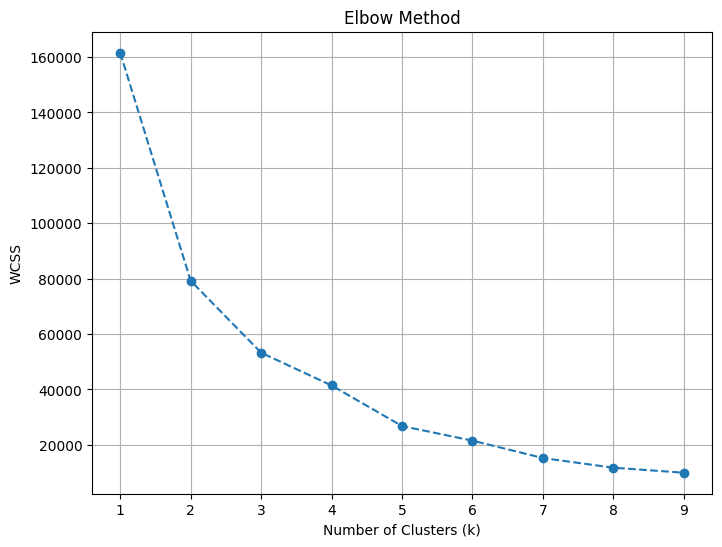

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np


features = ['Average Watch Time', 'User Subscriptions Added', 'Net Subscriptions']


df_agg_subscription.dropna(subset=features, inplace=True)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_agg_subscription[features])

wcss = []
for i in range(1, 10):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()


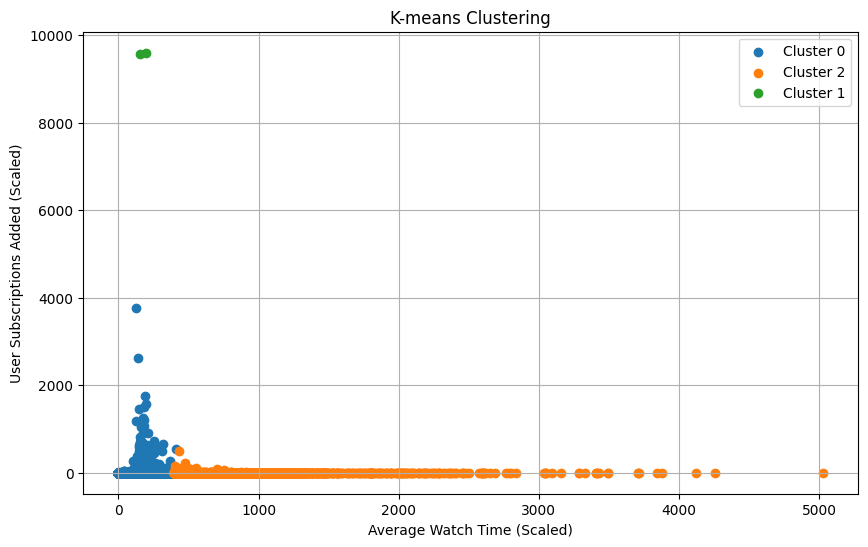

Cluster Centers:
   Average Watch Time  User Subscriptions Added  Net Subscriptions
0          157.391102                  2.213814           2.160082
1          175.380882               9579.500000        9481.500000
2          634.442994                  0.761280           0.734652


In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_agg_subscription['Cluster'] = kmeans.fit_predict(scaled_data)


plt.figure(figsize=(10, 6))
for cluster in df_agg_subscription['Cluster'].unique():
    cluster_data = df_agg_subscription[df_agg_subscription['Cluster'] == cluster]
    plt.scatter(cluster_data['Average Watch Time'], cluster_data['User Subscriptions Added'], label=f'Cluster {cluster}')

plt.title('K-means Clustering')
plt.xlabel('Average Watch Time (Scaled)')
plt.ylabel('User Subscriptions Added (Scaled)')
plt.legend()
plt.grid(True)
plt.show()


print("Cluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features))



Cluster 0 (Blue): This cluster represents users with a low average watch time of approximately 157.39 minutes and a low number of subscriptions added (around 2.21). These users are not spending much time watching the content and are not subscribing much. <br />
Solution: The content creator could focus on improving content quality or relevance to increase watch time. Since these users are not subscribing much, the creator could also work on improving the calls-to-action for subscription.<br />
Cluster 1 (Green): This cluster represents users with a moderate average watch time of approximately 175.38 minutes but a very high number of subscriptions added (around 9579.5). These users are spending a decent amount of time watching the content and are subscribing a lot.<br /> Solution: So The content creator is doing well with this group. They could continue to maintain the content quality and variety to keep these users engaged and subscribing.<br />
Cluster 2 (Orange): This cluster represents users with a very high average watch time of approximately 634.44 minutes but a low number of subscriptions added (around 0.76). These users are highly engaged with the content (high watch times), but are not subscribing much.<br /> Solution: The content creator could focus on encouraging subscriptions from these users through targeted messaging or incentives. Since these users are already highly engaged, they might be more likely to subscribe with a little encouragement.
<br />
The content creator might need to conduct further analysis or A/B testing to validate these solutions.

<h5>Top positive/negative words/sentences in comments</h5>


In [23]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df_comments['Comments'] = df_comments['Comments'].fillna('') 

def label_sentiment(text):
    score = SentimentIntensityAnalyzer().polarity_scores(str(text))
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    if neg > pos:
        return -neg
    elif pos > neg:
        return pos
    return 0

df_comments["sentiment"] = df_comments['Comments'].apply(label_sentiment)


In [24]:
# How many are positive and how many are negative?
is_negative = (df_comments["sentiment"] < 0)
comments_positive = df_comments[~is_negative].loc[:,['Comment_ID','Comments','sentiment']]
comments_negative = df_comments[is_negative].loc[:,['Comment_ID','Comments','sentiment']]
print(f"Positive: {len(comments_positive)}, Negative: {len(comments_negative)}")

Positive: 9466, Negative: 774


In [25]:
comments_positive.sort_values(["sentiment"],ascending=False,axis=0).head(20)

,Comment_ID,Comments,sentiment
7971,UgylCwZbHzBDbZzttLB4AaABAg,Cool,1.0
7260,UgzN1pIh53QCr3zqZBh4AaABAg,Cool,1.0
9989,Ugz_hoxausuOrgdt3vF4AaABAg,Great!!,1.0
9166,UgwxEtJXcx6ZlmTgJqx4AaABAg,:),1.0
1907,Ugx2xT33amruQfQcHw54AaABAg,nice,1.0
1908,UgxCKGSmoGMa2ir-eCF4AaABAg,woo!,1.0
4775,UgyheNQFgXq1rQIqKTJ4AaABAg,Excellent,1.0
6094,Ugxlm02P4gLiugKGse54AaABAg,Thanks,1.0
7352,UgyziXRXAqaDVQcaKDR4AaABAg,Thanks!,1.0
8637,Ugx3wSmwO-8tUYzAK0t4AaABAg,Awesome,1.0


In [26]:
# Let's see the most negative comments
negative = comments_negative.sort_values(["sentiment"],ascending=True,axis=0)
negative.head(50)

,Comment_ID,Comments,sentiment
3195,UgyFKnT4yt4tICQ_Drt4AaABAg,Fight!,-1.000
76,Ugy-rljZ-DeN_y-mGNN4AaABAg,No,-1.000
1726,UgyhqOU93aFLiesQZv94AaABAg,Ignore the haters!,-0.857
9463,UgzI61hQm_wg85qcnhN4AaABAg,hell ya,-0.821
2036,UgzVQZcSYBqMdwahs814AaABAg,4:24 broken,-0.756
1162,Ugyfg_uGG6yZAsx3djd4AaABAg,Fire explanation!!,-0.749
4484,Ugx1TV35RsDElw5D1el4AaABAg,NOOOOOOOOOOOOO :(,-0.744
8541,Ugx-9vjWOQ_nyTJJ8TZ4AaABAg,Ridiculous mic. Completely useless.,-0.737
4744,UgzFoJGR3EPb98CyF0B4AaABAg,OH NO I MISSED IT!!!,-0.725
6320,Ugy4v_XIDzq1jzWQSlx4AaABAg,Why people dislike this? wtf,-0.703


There were  9466 positive comments thanking him for creating content which helped them to gain knowledge from it.<br />
There were 774 negative comments focusing on user complaints mainly about
1. Audio quality
2. Thumbnails
3. Errors
4. Content is not strong enough for users<br />
This can be improved by using better thumbnails and improving the audio quality,showing the errors  you have encounterd while creating the project and methods you used to solve those errors. eg: using ChatGPT to analyze the error and to find the solution for it.

<h5>Factors contributing to fluctuations in the profitability of Ken Jee's YouTube channel over time</h5>

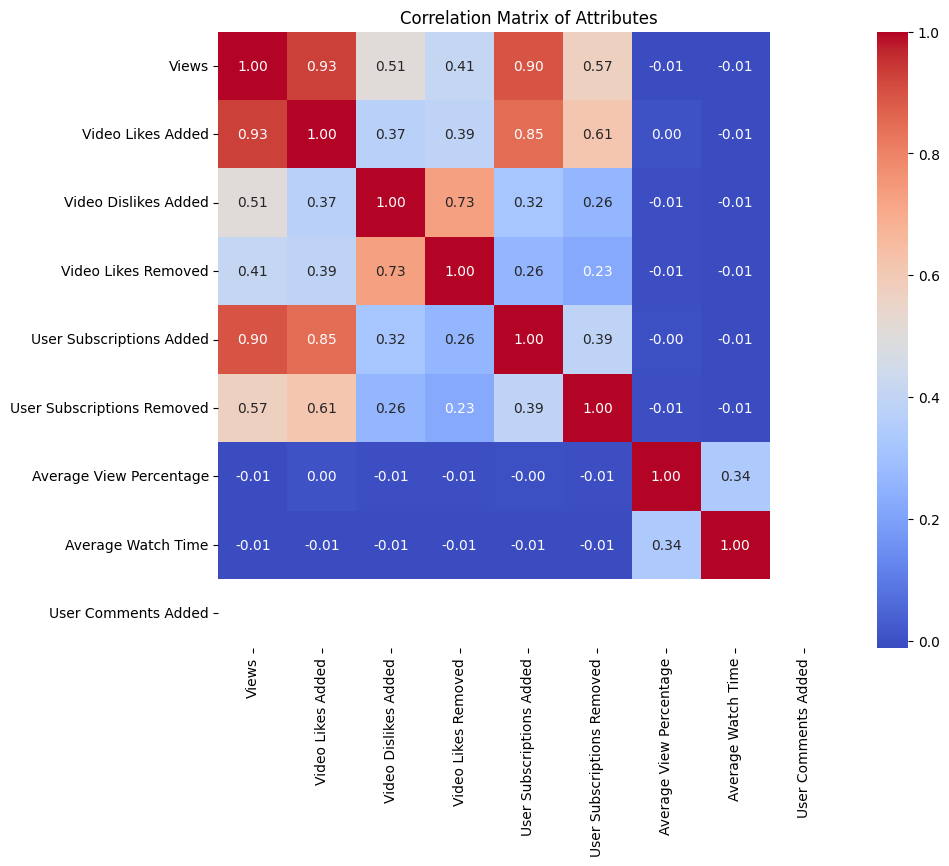

In [32]:
import seaborn as sns
attributes = ['Views', 'Video Likes Added', 'Video Dislikes Added', 
              'Video Likes Removed', 'User Subscriptions Added', 
              'User Subscriptions Removed', 'Average View Percentage', 
              'Average Watch Time', 'User Comments Added']

# Compute correlation matrix
correlation_matrix = df_video_over_time[attributes].corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Attributes')
plt.show()


The key areas required to focus:<br />
1.Engage with Your Audience:<br />The correlation between user comments and other metrics may not be very high, but audience engagement is still crucial. Responding to comments, asking for feedback, and creating a community around your content can help increase viewer loyalty and engagement.<br />
2.Monitor Video Likes and Dislikes:<br />Keep an eye on the likes and dislikes on your videos. A high number of dislikes relative to likes could indicate that the content is not resonating with your audience, and you may need to adjust your content strategy accordingly.<br />
3.Improve Average View Percentage and Watch Time:<br /> Although these metrics showed low correlations with others, they are important for YouTube’s recommendation algorithm. Try to create engaging content that keeps viewers watching for longer. This could involve experimenting with different video lengths, structures, or topics.<br /><br />
It’s important to consider other factors such as your target audience, content strategy, and personal goals for the channel. Also, continually testing and learning from your analytics data will help you make more informed decisions and improve your channel over time.

To increase the profits of Ken Jee's YouTube channel, we can conduct some further analysis:
1. Drive audience growth through targeted marketing efforts, collaborations with fellow creators, and strategic utilization of social media platforms to amplify content reach and engagement.
2. Cultivate collaborations and partnerships with influencers and brands within Ken Jee's niche, leveraging synergies to extend channel exposure and attract new viewer segments.
3. Conduct ongoing performance monitoring, analyzing key metrics, and adapting strategies iteratively to seize emerging opportunities and mitigate challenges, ensuring sustained channel growth and profitability.
4. Optimization of SEO and Metadata: Ensure that video titles, descriptions, and tags are optimized for search engines to improve discoverability and reach a larger audience.
5. Collaborations and Partnerships: Explore opportunities for collaborations with other creators or brands within Ken Jee's niche to increase exposure and reach new audiences.








<h5>Conclusion</h5>
<ol>
<li>Videos generated the highest revenue in terms of RPM and CPM:</li>
<ul>
<li>The analysis shows the growth of RPM and CPM over time, with significant peaks observed, especially in early 2018.</li>
<li>By identifying peak times for viewer activity (midnight on Fridays), Ken Jee can strategically schedule video uploads to maximize initial views and engagement.</li>
<li>The word cloud analysis highlights topics that resonate with the audience, such as Data Science, Machine Learning, Python, and Projects. Ken Jee can capitalize on these interests by creating more content around these themes.</li>
</ul>
<li>K-means clustering to analyze factors affecting the channel:</li><ul>
<li>Clustering analysis identifies three distinct user segments based on average watch time and subscription behavior.</li>
<li>Recommendations are provided for each cluster to optimize content strategy and subscription conversion rates.</li>
<li>Further A/B testing and analysis may be needed to validate these recommendations and refine content strategies accordingly.</li></ul>
<li>Top positive/negative words/sentences in comments:</li>
<ul>
<li>The analysis identifies a significant number of positive comments expressing gratitude for the content.</li>
<li>Negative comments mainly focus on audio quality, thumbnails, errors, and content strength.</li>
<li>Suggestions are provided to address negative feedback, such as improving thumbnails, audio quality, and addressing errors transparently in content.</li></ul>
<li>Factors contributing to fluctuations in profitability:</li>
<ul><li>Engaging with the audience, monitoring likes/dislikes, and improving average view percentage and watch time are highlighted as key areas for optimization.</li>
<li>While correlations between some metrics may be low, focusing on these factors can improve overall viewer satisfaction and channel performance.</li></ul>
</ol>